# Algorithm : Piecewise Aggregate Approximation (PAA)

<h5>Description:</h5>
<ul>
<li>This algorithm segments a time series into continuous pieces and approximates each segment with a linear function.</li>
<li>It employs Piecewise Aggregate Approximation (PAA) to reduce the dimensionality of the time series by dividing it into segments.</li>
<li>The number of segments is specified by the user.</li>
<li>After segmentation, it reconstructs the time series from the PAA representation.</li>
<li>The resulting time series is a piecewise linear approximation of the original data.</li>
</ul>


<h3>Importing the necessary libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation

## Define Functions

In [2]:
def read_data_from_txt_file(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            data = [float(line.strip()) for line in lines if line.strip()]
        xs = np.arange(len(data))
        ys = np.array(data)
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None

def read_data_from_csv_file(file_path,target_name):
    try:
        df=pd.read_csv(file_path)
        xs = np.arange(len(df))
        ys = df[target_name].values
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None

In [15]:
def paa(dataset,n_segments=12,mu=0., std=1.):
    scaler = TimeSeriesScalerMeanVariance(mu,std)
    dataset = scaler.fit_transform(dataset)
    paa = PiecewiseAggregateApproximation(n_segments)
    paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))
    
    plt.figure(figsize=(20,10))
    plt.plot(dataset[0].ravel(),label='Raw Time Series')
    plt.plot(paa_dataset_inv[0].ravel(), label='PAA')
    plt.legend(loc='best')
    plt.show()

<h3>Testing Algorithm on Weather Data</h3>

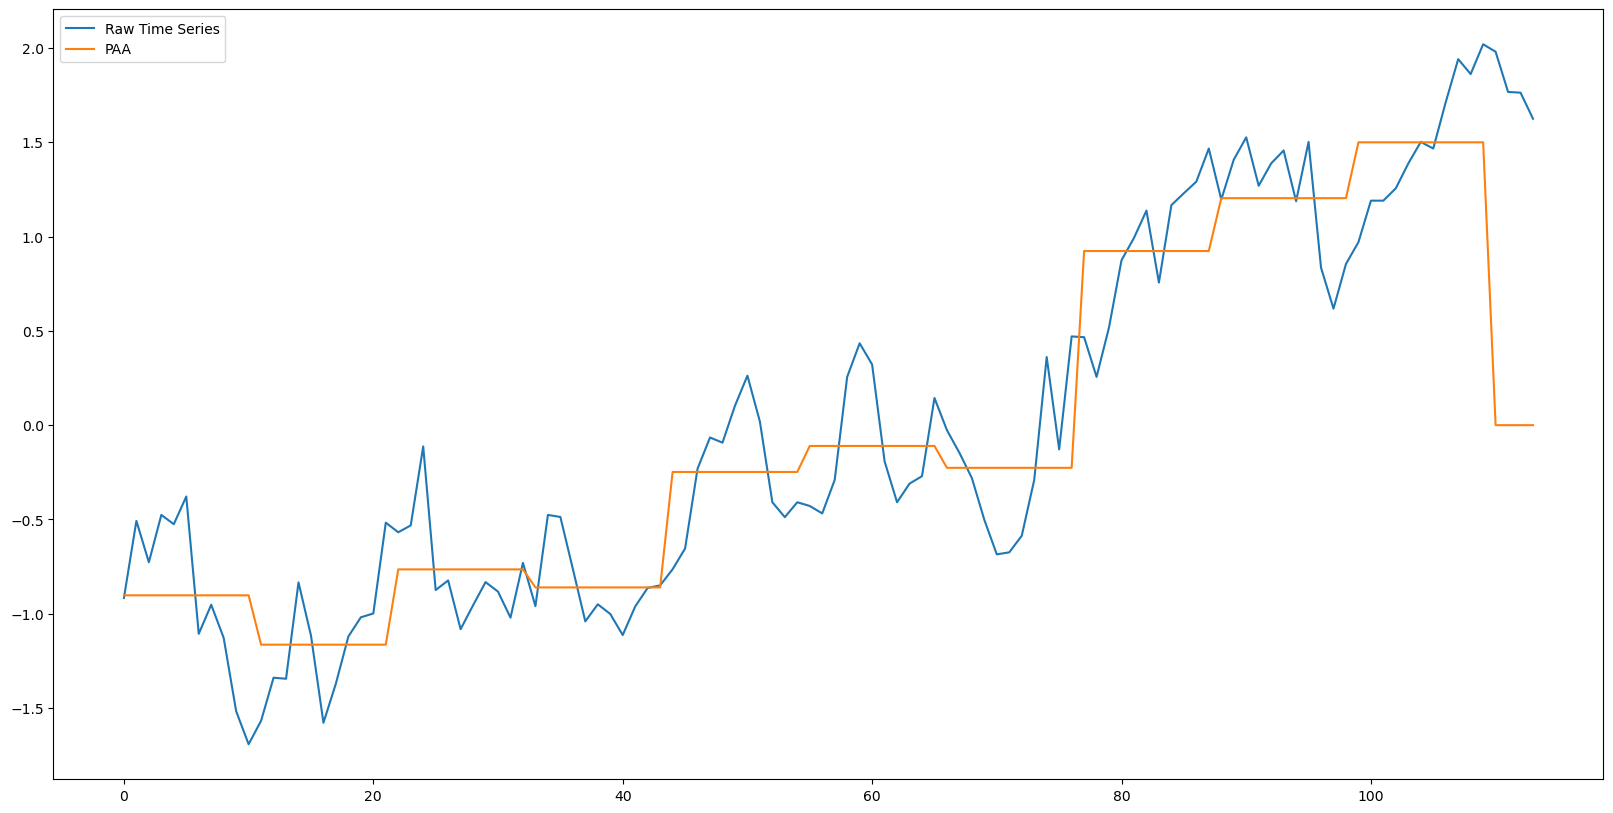

In [17]:
# Read data from a CSV file
file_path = '../datasets/weather dataset/DailyDelhiClimateTest.csv'
X, y = read_data_from_csv_file(file_path,target_name="meantemp")
paa(y.reshape(1,-1),10)

<h3>Testing Algorithm on DodgerLoopDay Data</h3>

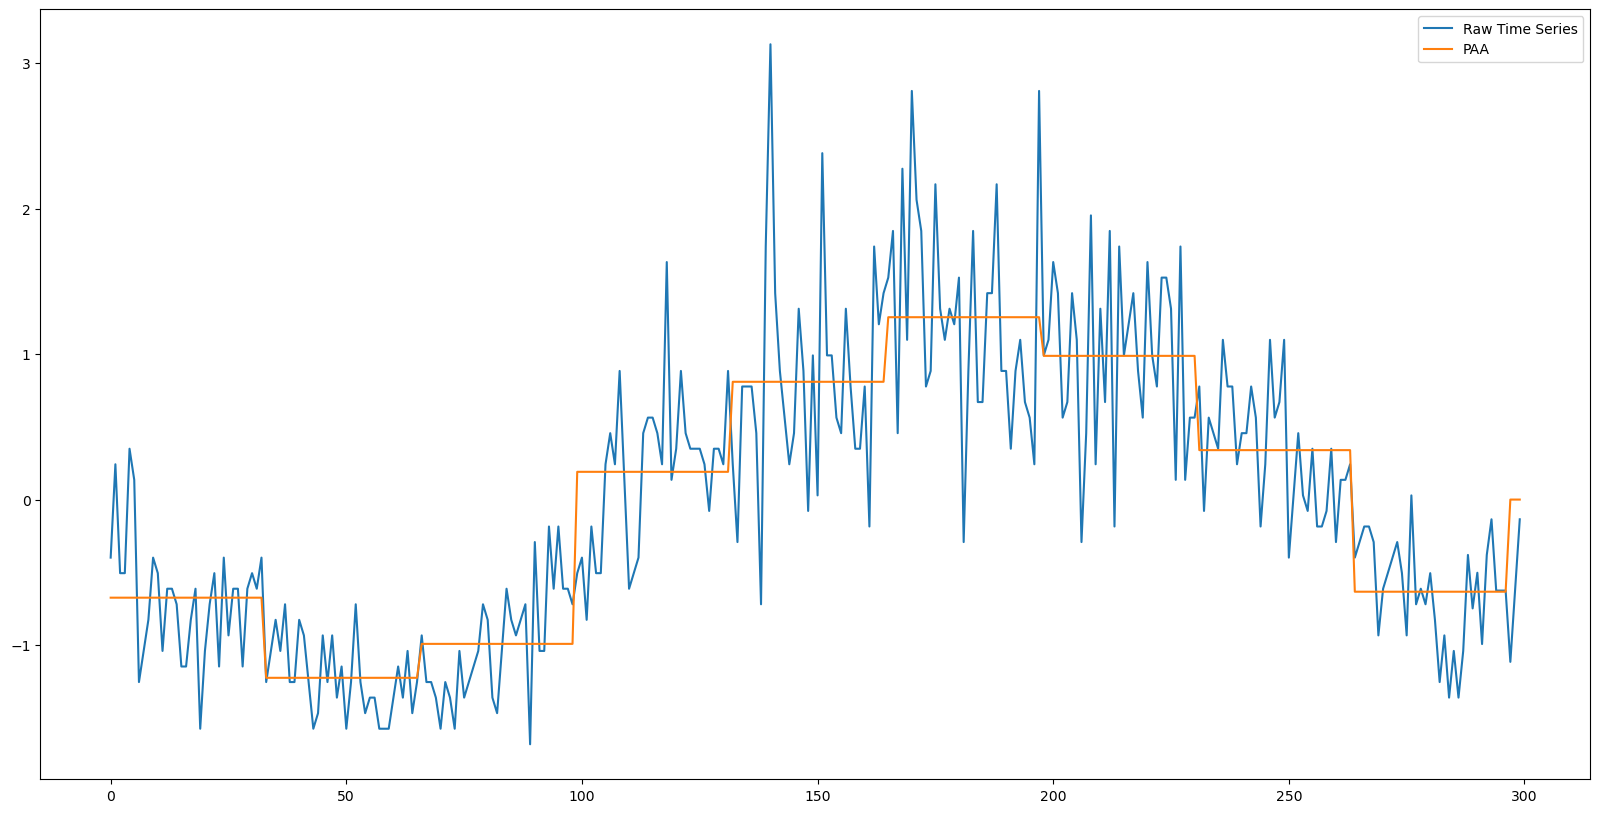

In [19]:
# Read data from a CSV file
file_path = '../datasets/UCR Time Series/DodgerLoopDay.txt'
X, y = read_data_from_txt_file(file_path)
paa(y[:300].reshape(1,-1),9)

<h3>Testing Algorithm on DiatomSizeReduction Data</h3>

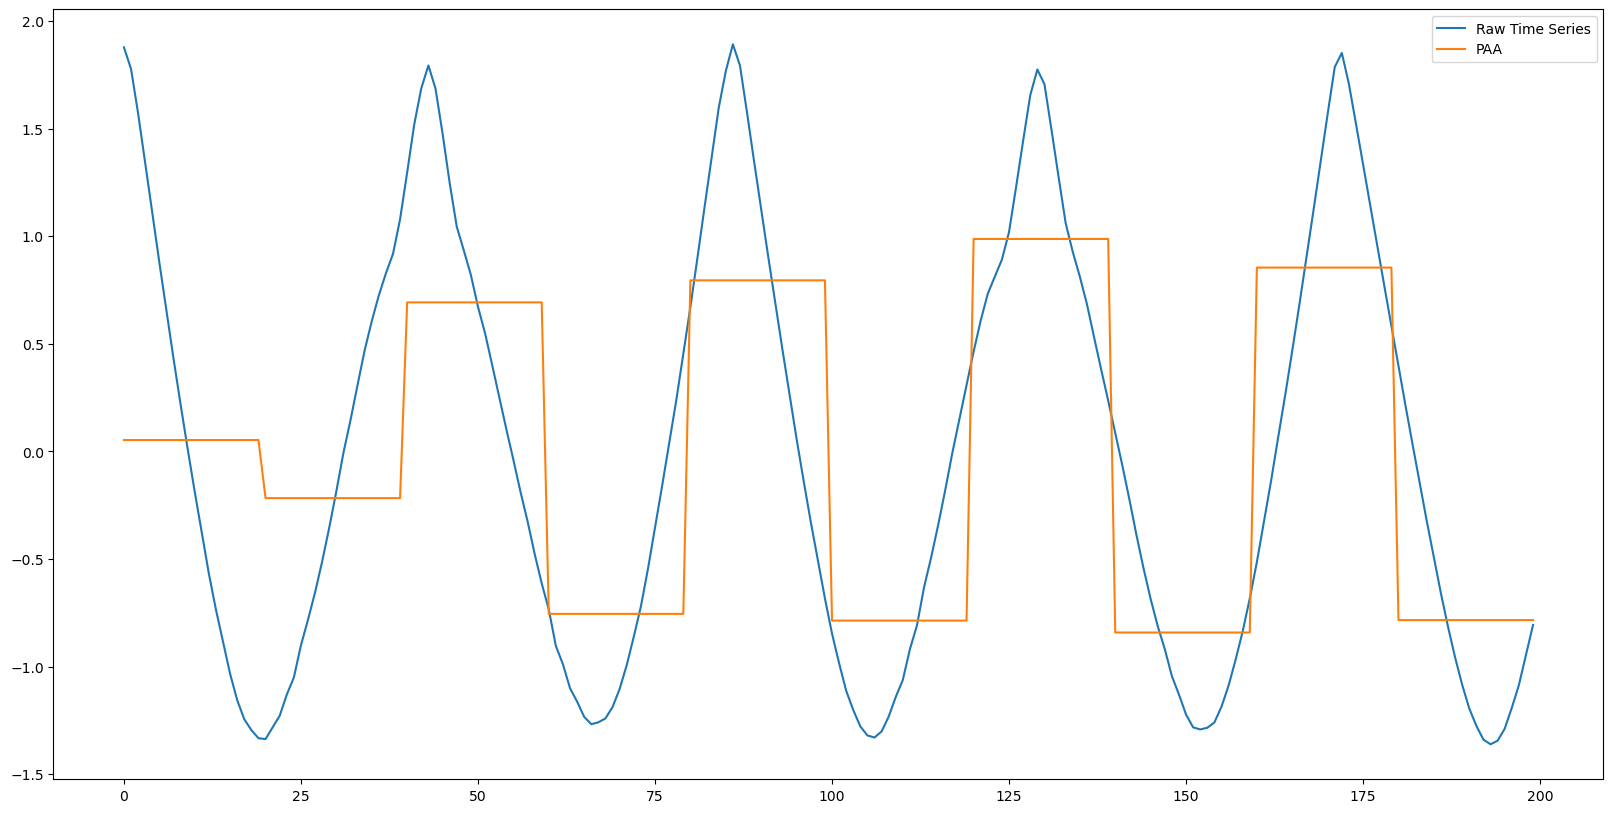

In [21]:
# Read data from a CSV file
file_path = '../datasets/UCR Time Series/DiatomSizeReduction.txt'
X, y = read_data_from_txt_file(file_path)
paa(y[:200].reshape(1,-1),10)

<h3>Testing Algorithm on CBF Data</h3>

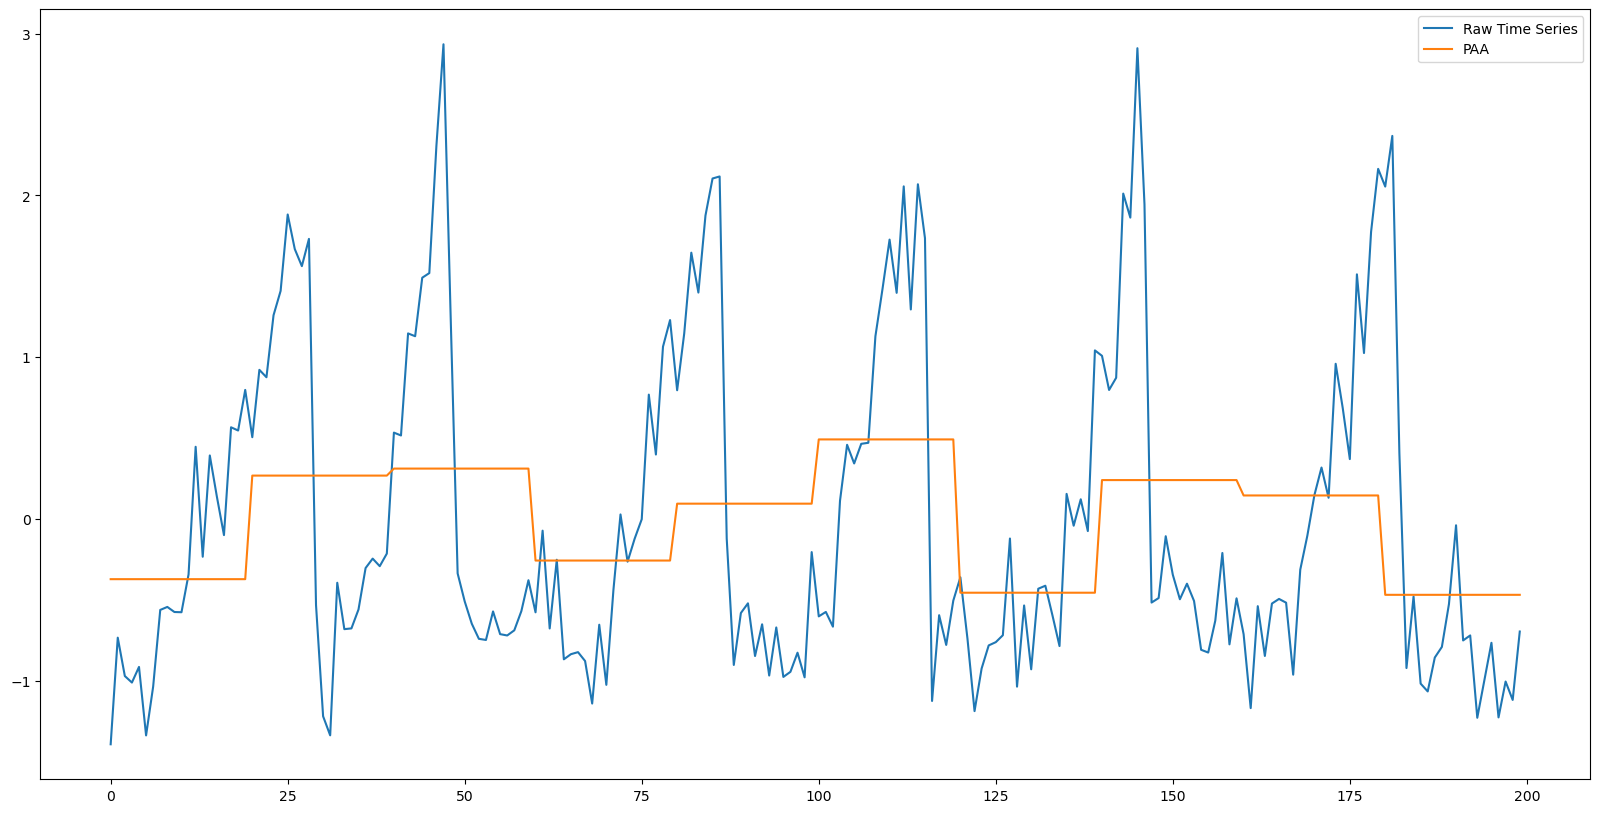

In [23]:
# Read data from a CSV file
file_path = '../datasets/UCR Time Series/CBF.txt'
X, y = read_data_from_txt_file(file_path)
paa(y[:200].reshape(1,-1),10)

<h3>Testing Algorithm on Herring Data</h3>

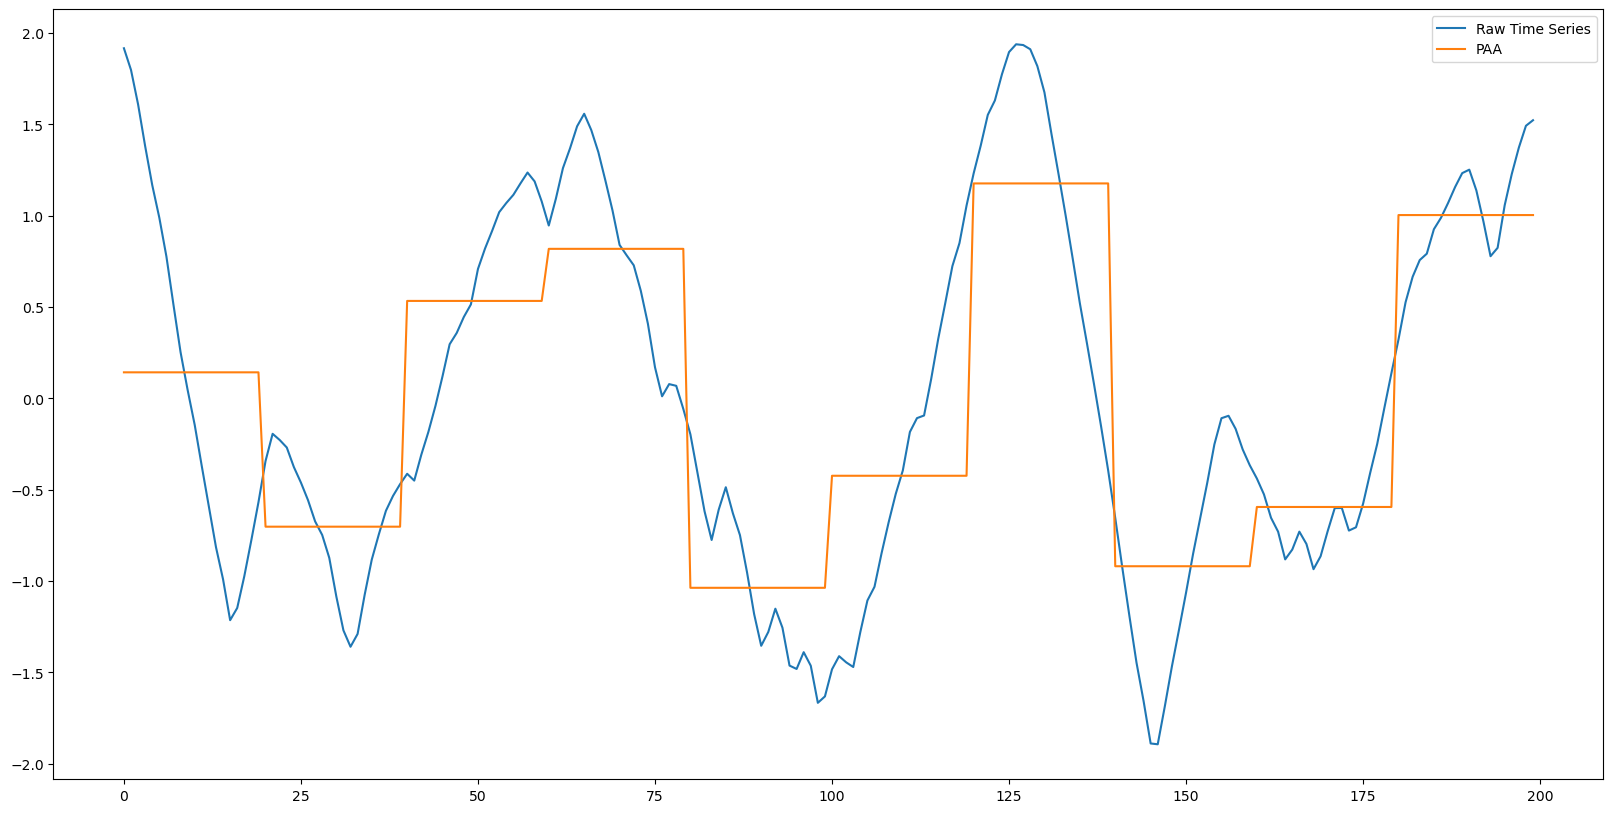

In [24]:
# Read data from a CSV file
file_path = '../datasets/UCR Time Series/Herring.txt'
X, y = read_data_from_txt_file(file_path)
paa(y[:200].reshape(1,-1),10)